In [5]:
import numpy as np
import matplotlib.pyplot as plt
import csv as csv
from scipy.ndimage import gaussian_filter as g
from scipy.signal import find_peaks

# Wir definieren uns einen Vektor
Samples: $n$

In [25]:
n = 128
x = np.arange(0,n)
print(x)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]


# Wir wollen die Sinus-Funktion zeichnen
## Was ist die Bedeutung von f?
## Wie verändert sich die Schwingung im Vergleich von
## $f = \frac{1}{n-1}\cdot 20$  zu $f = \frac{1}{n-1}\cdot10$
## und $f = \frac{1}{n-1}\cdot 20$ zu $f = \frac{1}{n-1}\cdot 1$

0.15748031496062992


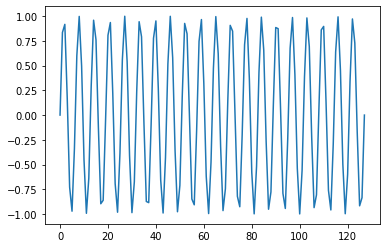

In [58]:
f = 1/(n-1)*20
y = np.sin(2*np.pi*f*x)
print(f)
plt.plot(x,y)

# Wir berechnen 
## die Fouriertransformation, die Frequenzachse
# Und zeichen real- und imaginärteil

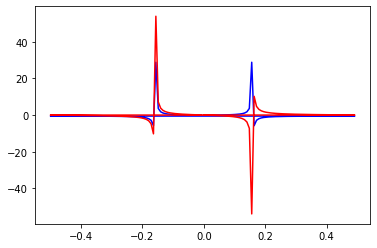

In [62]:
sp = np.fft.fft(y)
freq = np.fft.fftfreq(x.shape[-1])
plt.plot(freq, sp.real,'-b', freq, sp.imag,'-r')

In [2]:
with open(r'SampleData/revolution-sample-data/ECG/SampleECG_wHeader.txt',newline='') as csvfile:
    raw_data = csv.reader(csvfile, delimiter='\t', quotechar='"')
    header = next(raw_data)
    data = dict()
    for t in header:
        data[t] = list()
    for row in raw_data:
        for index, t in enumerate(header):
            data[t].append(row[index])
        

In [3]:
print(header)

['nSeq', 'I1', 'I2', 'O1', 'O2', 'A2']


In [4]:
print(len(data['A2']))

22350


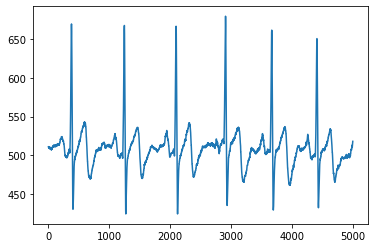

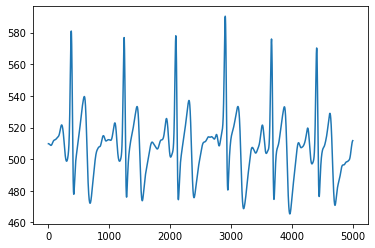

In [10]:
x0 = 2000
samples = 100
ecg = np.array(data['A2'][-9000:-4000]).astype('float')
plt.figure(1)
plt.plot(ecg)
plt.figure(2)
plt.plot(g(ecg, sigma=15))

[173. 238. 243. 251. 227. 219.] [21.34230769 26.23076923 27.36607143 28.22222222 26.56043956 27.125     ]


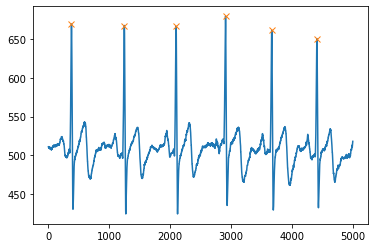

In [21]:
peaks, properties = find_peaks(ecg, prominence=100, width=10)
print(properties["prominences"], properties["widths"])
plt.plot(ecg)
plt.plot(peaks, ecg[peaks], "x")

In [22]:
print(peaks)

[ 378 1247 2096 2909 3668 4410]


In [23]:
[peaks[i] -peaks[i-1] for i in range(1, len(peaks))]

[869, 849, 813, 759, 742]